In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import csv
import pandas as pd
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)
import HayLabAnalysis as hla
import matplotlib



from ephyviewer import mkQApp, MainViewer, TraceViewer
from ephyviewer import AnalogSignalSourceWithScatter

In [10]:
#define file
folder = 'S:/waking/audrey_hay/NPX/NPX4/Claustrum/Expe_2024-07-18_12-00-43'
LFPfile='S:/waking/audrey_hay/NPX/NPX4/Claustrum/Expe_2024-07-18_12-00-43/OE_32ch_data_2024-07-18T12_01_54.bin'
TSfile='S:/waking/audrey_hay/NPX/NPX4/Claustrum/Expe_2024-07-18_12-00-43/OE_timestamps_2024-07-18T12_01_54.csv'


In [24]:
#import timestamps
ts = pd.read_csv(TSfile,names=['ts'])
idx_tokeep = ts[~ts.duplicated()].index
print(idx_tokeep)

Index([   0,    1,    5,    9,   13,   17,   21,   25,   29,   33,
       ...
       7977, 7981, 7985, 7989, 7993, 7997, 8001, 8005, 8009, 8013],
      dtype='int64', length=2005)


In [ ]:
thedata = hla.experiment(folder)
thedata.analyseExpe_findData()
combined = thedata.data['OE_LFP'].combineStructures(None)

FileChooser(path='\\10.69.168.1\crnldata\waking\audrey_hay\NPX\NPX4\Claustrum\Expe_2024-07-18_12-00-43', filen…

S:\waking\audrey_hay\NPX\NPX4\Claustrum\Expe_2024-07-18_12-00-43
found some .bin files
importing S:\waking\audrey_hay\NPX\NPX4\Claustrum\Expe_2024-07-18_12-00-43\OE_32ch_data_2024-07-18T12_01_54.bin
IntanLFP file loaded, with 32 channels and 2052352 datapoint
found some NPX files


(2052352, 32)
[[  226   964   423    19   357    25    12    13   151   364   574   451
     68   279    29    20  -122  -328 -1317  -728  -594  -634  -186  -170
   -338  -617  -868  -706  -436  -559  -755  -554]
 [  227   961   484    63   424    -7    55     7   175   429   571   416
    144   288    52   -21  -107  -336 -1298  -704  -629  -659  -218  -194
   -338  -690  -900  -696  -460  -559  -749  -577]
 [  186   956   582    31   437    17    60    39   173   528   571   449
    148   308    47   -39   -94  -340 -1340  -769  -680  -671  -261  -159
   -367  -688  -908  -783  -460  -524  -776  -643]
 [  148   974   646    14   396    81    34    65   216   459   548   361
    106   300    35   -20  -134  -329 -1333  -741  -710  -698  -196   -87
   -311  -677  -903  -803  -461  -492  -760  -627]
 [  207   963   582    15   425   137     6    43   236   533   607   511
    136   311    25    17  -154  -351 -1329  -736  -710  -709  -229   -66
   -268  -658  -902  -864  -428  -538  -76

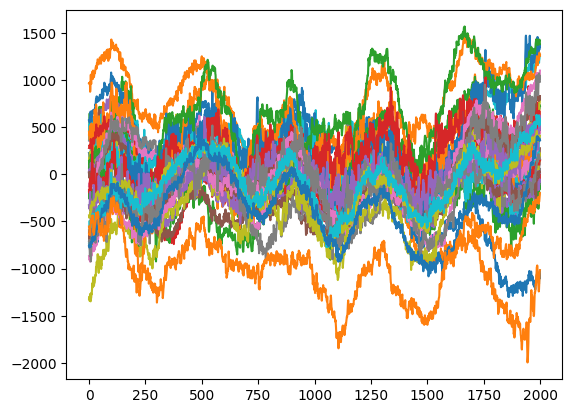

In [40]:
buffer=256
print(combined.shape)
print(combined[:5,:])

work = combined.reshape(-1,buffer,32)
work_filtered=work[idx_tokeep,:,:]
print(work[0,:5,:])
print(work.shape)
print(work_filtered.shape)

C = work_filtered.reshape(-1,32)
plt.plot(C[:2000,:])
plt.show()


In [ ]:
%matplotlib inline




plt.close('all')
j=4
leng=256
can = 15
tot= 3#int(combined.shape[0]/leng)
new = np.zeros((combined.shape[0]*2,0))
for can in range(1):
    print(combined[:5,can])
    halfC1 = combined[:,can].reshape(-1,leng)
    print(halfC1[0,:5])
    halfC = combined[:,can+16].reshape(-1,leng)
    C=np.concatenate((halfC1,halfC),axis=1)
    print(C[0,:5])
    plt.plot(halfC1[0,:], color = 'red') #2, 9
    plt.plot(halfC[0,:], color = 'blue') #2, 9
    plt.plot(C[0,:], color = 'green') #2, 9
    print(C.shape)
    C = C.flatten()
    print(C[:512])
    new = np.concatenate((new,C[:,np.newaxis]),axis=1)
    print(new[:5,can])
print(new.shape)

plt.plot(C[:1700], color = 'orange') #2, 9
plt.plot(combined[:1700,can], color = 'black') #2, 9
plt.show()
#combined=new


In [ ]:
%gui qt
app = mkQApp()


sample_rate = 1000.
t_start = 0.

#Create the main window that can contain several viewers
win = MainViewer()
view1 = TraceViewer.from_numpy(new, sample_rate, t_start, 'Signals', channel_names=channelLabels)
#view1 = TraceViewer(source=source)
win.add_view(view1)

#Parameters can be set in script
view1.params['display_labels'] = True
view1.params['scale_mode'] = 'same_for_all'
view1.auto_scale()

cmap = matplotlib.colormaps["hsv"]#Wistia"]
nCh = len(view1.by_channel_params.children())
for ch in range(nCh):
    #view1.by_channel_params[f'ch{ch}', 'gain'] = 0.00002
    #view1.by_channel_params[f'ch{ch}', 'offset'] = 0.1
    view1.by_channel_params[f'ch{ch}', 'color'] = matplotlib.colors.to_hex(cmap(ch/nCh), keep_alpha=False)
    pass


#Run
win.show()
#app.exec()  #if commented, the app is shown and fonctionnal. Maybe detecting buttons. the Python icon doesn't close any better